In [1]:
"""
Part 1: Building up the predicitve model 
""" 

'\nPart 1: Building up the predicitve model \n'

In [2]:
"""imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix

In [3]:
"""Data cleaning and transformation:"""

df = pd.read_csv('london_listings.csv')  #loading the data set into a dataframe (df), so it can be manipulated

In [4]:
"""Showing the shape of the dataframe:"""
                       
print("Shape of dataframe:", df.shape) 

Shape of dataframe: (66679, 31)


In [5]:
"""Creating two lists: one for catgeorical varibles and another for numerical variables"""

#Ensuring these columns are identified as numerical
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)
df['host_response_rate'] = df['host_response_rate'].astype(str).str.replace('%', '', regex=False).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.replace('%', '', regex=False).astype(float)

cat_variables = df.select_dtypes(include=['object']).columns.tolist()
num_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical Variables:", cat_variables)
print("\nNumerical Variables:", num_variables)



Categorical Variables: ['name', 'description', 'host_name', 'host_since', 'host_is_superhost', 'neighbourhood', 'property_type', 'room_type', 'bathrooms_text', 'amenities', 'calendar_last_scraped', 'first_review', 'last_review']

Numerical Variables: ['id', 'host_id', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count']


In [6]:
"""Removing non numerical characters from the price column and making sure the numbers are of numeric type"""

#using string function to remove non-numeric characters
df['price'] = pd.to_numeric(
    df['price'].astype(str).str.strip().replace(r'[\$,]', '', regex=True),
    errors='coerce'
)

# Checking the price of the first 10 rows to see if the above line worked
print(df['price'].head(10))
print(df.loc[df['price'].isnull(), 'price'].head())

0    200.0
1    675.0
2     95.0
3    166.0
4    105.0
5    134.0
6    280.0
7    360.0
8    546.0
9     87.0
Name: price, dtype: float64
10    NaN
13    NaN
36    NaN
45    NaN
158   NaN
Name: price, dtype: float64


In [7]:
"""Replacing empty strings and lists with NAN for all categorical variables"""

for col in cat_variables:
    df[col] = df[col].replace(['', '[]'], np.nan)

#checking updated data by seeing how many categorical variable columns contain null variables
print(df[cat_variables].isnull().sum())

# if the print statement does NOT execute the data cleansing was successful
for col in cat_variables:
    empty = df[col].astype(str).str.contains(r'\[\s*\]')
    if empty.sum() > 0:
        print(f"{col}: contains '[]' or '[ ]' = {mask_contains_brackets.sum()}")


name                         0
description               1956
host_name                    1
host_since                   1
host_is_superhost          380
neighbourhood                0
property_type                0
room_type                    0
bathrooms_text             100
amenities                  136
calendar_last_scraped        0
first_review             14736
last_review              14736
dtype: int64


In [8]:
"""Showing a summary of all missing values and summary statistics"""

pd.options.display.float_format = '{:.2f}'.format

# Summary of missing values
missing = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)
missing_summary = pd.DataFrame({'Missing Values': missing, 'Percent Missing': missing_percent})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

print("\nMissing values summary:")
print(missing_summary)

# Summary statistics for all columns (numeric + categorical)
print("\nSummary statistics (numeric and categorical):")
print(df.describe(include='all').round(2))



Missing values summary:
                           Missing Values  Percent Missing
description                          1956             2.93
host_name                               1             0.00
host_since                              1             0.00
host_response_rate                  10175            15.26
host_acceptance_rate                 7146            10.72
host_is_superhost                     380             0.57
host_listings_count                     1             0.00
host_total_listings_count               1             0.00
bathrooms                            5329             7.99
bathrooms_text                        100             0.15
bedrooms                              101             0.15
beds                                 5400             8.10
amenities                             136             0.20
price                                5261             7.89
first_review                        14736            22.10
last_review                    

In [9]:
"""Dropping unnecessary columns"""

unnecessary_cols = [
    'id',                    # identifier no meaning/predicitve power
    'name',                  # mostly unique and too unstructured
    'description',           # too unstructured
    'host_id',               # identifier no meaning/predicitve power
    'host_name',             # string, no predictive power
    'calendar_last_scraped', # metadata
    'latitude',              # not useful for the model
    'longitude',             # not useful for the model
    'bathrooms_text',        # redundant
    'amenities',             # too unique and not consistent between different sellers
    'first_review',          # just the date, not useful 
    'last_review'            # just the date, not useful
]

df.drop(columns=unnecessary_cols, inplace=True, errors='ignore')

# Check remaining columns
print("Remaining columns:")
print(df.columns.tolist())


Remaining columns:
['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'neighbourhood', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count']


In [10]:
"""Dropping duplicate columns"""

df.drop_duplicates(inplace=True) 
#checking to see if there are any duplicates
df.columns.tolist()

['host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'neighbourhood',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'calculated_host_listings_count']

In [11]:
"""Dropping rows with NAN value"""

print(df.shape)
df.dropna(inplace=True)

#checking to see if any NAN values remain or not
print("Remaining missing values:", df.isnull().sum().sum())

(66246, 19)
Remaining missing values: 0


In [12]:
"""Removing outliers""" 

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

#Defining lower and upper bounds for filtering
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Shape before removing price outliers:", df.shape)

#Filtering out rows outside the bounds
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Shape after removing price outliers:", df.shape)

Shape before removing price outliers: (42720, 19)
Shape after removing price outliers: (40047, 19)


In [13]:
"""Showing the shape of the resulting dataframe"""

print("Initial shape of the dataframe was '(66679, 31)'")
print("Now the shape of the dataframe is: ", df.shape)


Initial shape of the dataframe was '(66679, 31)'
Now the shape of the dataframe is:  (40047, 19)


In [14]:
"""logging the price column and normalising the data"""

df = df[df['price'] > 0] #Ensuring only valid values remain
df['log_price'] = np.log(df['price'])

df['accommodates_vis'] = df['accommodates'] #Keeping the original accomodates column for visualisations later on
#Retrieving numerical features (excluding the targets price and log price)
num_variables = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_variables.remove('price')  #Keep target unscaled
num_variables.remove('log_price')  #Keep target unscaled
num_variables.remove('accommodates_vis') #Keep this column unscaled for visualisation


#Normalising these features by scaling
scaler = MinMaxScaler()
df[num_variables] = scaler.fit_transform(df[num_variables])

#Checking to see if our code worked 
print(df[num_variables].describe().T)
print("Any values < 0:", (df[num_variables] < 0).any().any())
print("Any values > 1:", (df[num_variables] > 1).any().any())

                                  count  mean  std  min  25%  50%  75%  max
host_response_rate             40046.00  0.95 0.16 0.00 0.99 1.00 1.00 1.00
host_acceptance_rate           40046.00  0.86 0.22 0.00 0.82 0.97 1.00 1.00
host_listings_count            40046.00  0.01 0.05 0.00 0.00 0.00 0.00 1.00
host_total_listings_count      40046.00  0.01 0.04 0.00 0.00 0.00 0.00 1.00
accommodates                   40046.00  0.15 0.13 0.00 0.07 0.07 0.20 1.00
bathrooms                      40046.00  0.08 0.04 0.00 0.06 0.06 0.09 1.00
bedrooms                       40046.00  0.09 0.05 0.00 0.06 0.06 0.12 1.00
beds                           40046.00  0.06 0.05 0.00 0.04 0.04 0.07 1.00
minimum_nights                 40046.00  0.00 0.01 0.00 0.00 0.00 0.00 1.00
maximum_nights                 40046.00  0.00 0.00 0.00 0.00 0.00 0.00 1.00
number_of_reviews              40046.00  0.02 0.04 0.00 0.00 0.01 0.02 1.00
review_scores_rating           40046.00  0.92 0.12 0.00 0.89 0.96 1.00 1.00
calculated_h

In [15]:
"""Data exploration"""

'Data exploration'

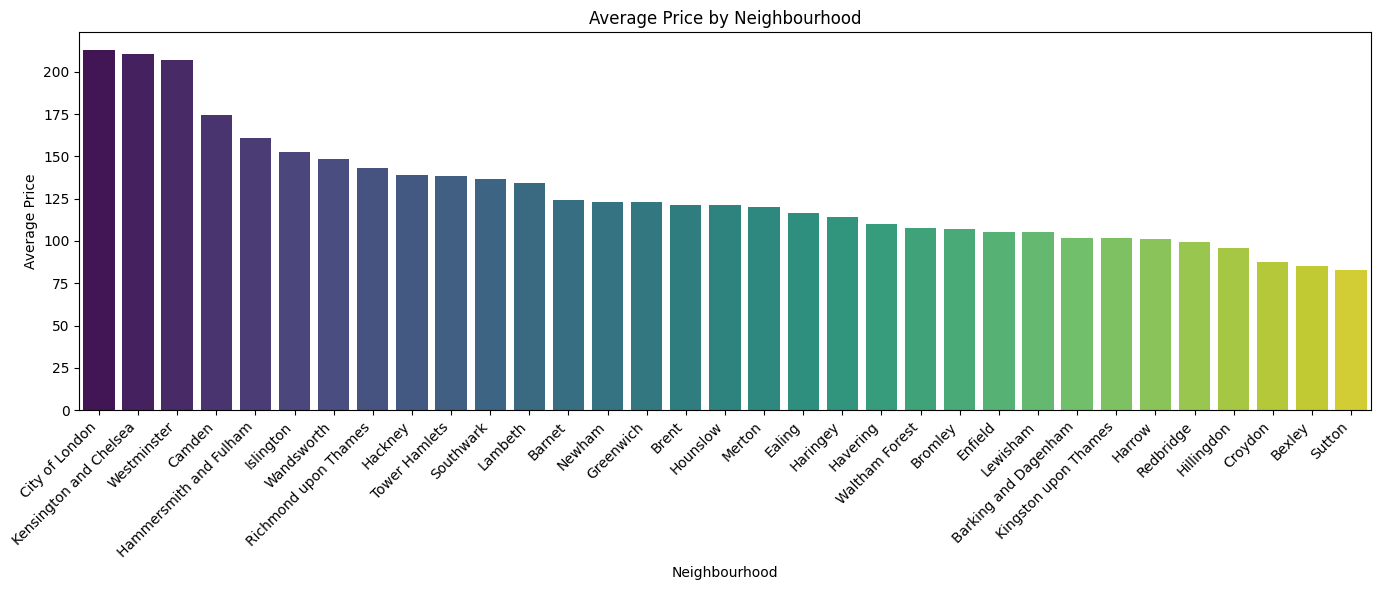

In [16]:
"""Visualising the price across neighbourhoods: bar plot"""

#Use this dataframe as a means of plotting the average price by neighbourhood 
avg_price_nei_df = df.groupby('neighbourhood', as_index=False)['price'].mean().sort_values(by='price', ascending=False)

#Creating the box plot
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_price_nei_df, x='neighbourhood', y='price',hue ='neighbourhood', palette='viridis', legend=False)

#Labelling and format
plt.title("Average Price by Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=45, ha='right')  # Rotate and align labels to prevent overlap
plt.tight_layout()
plt.show()

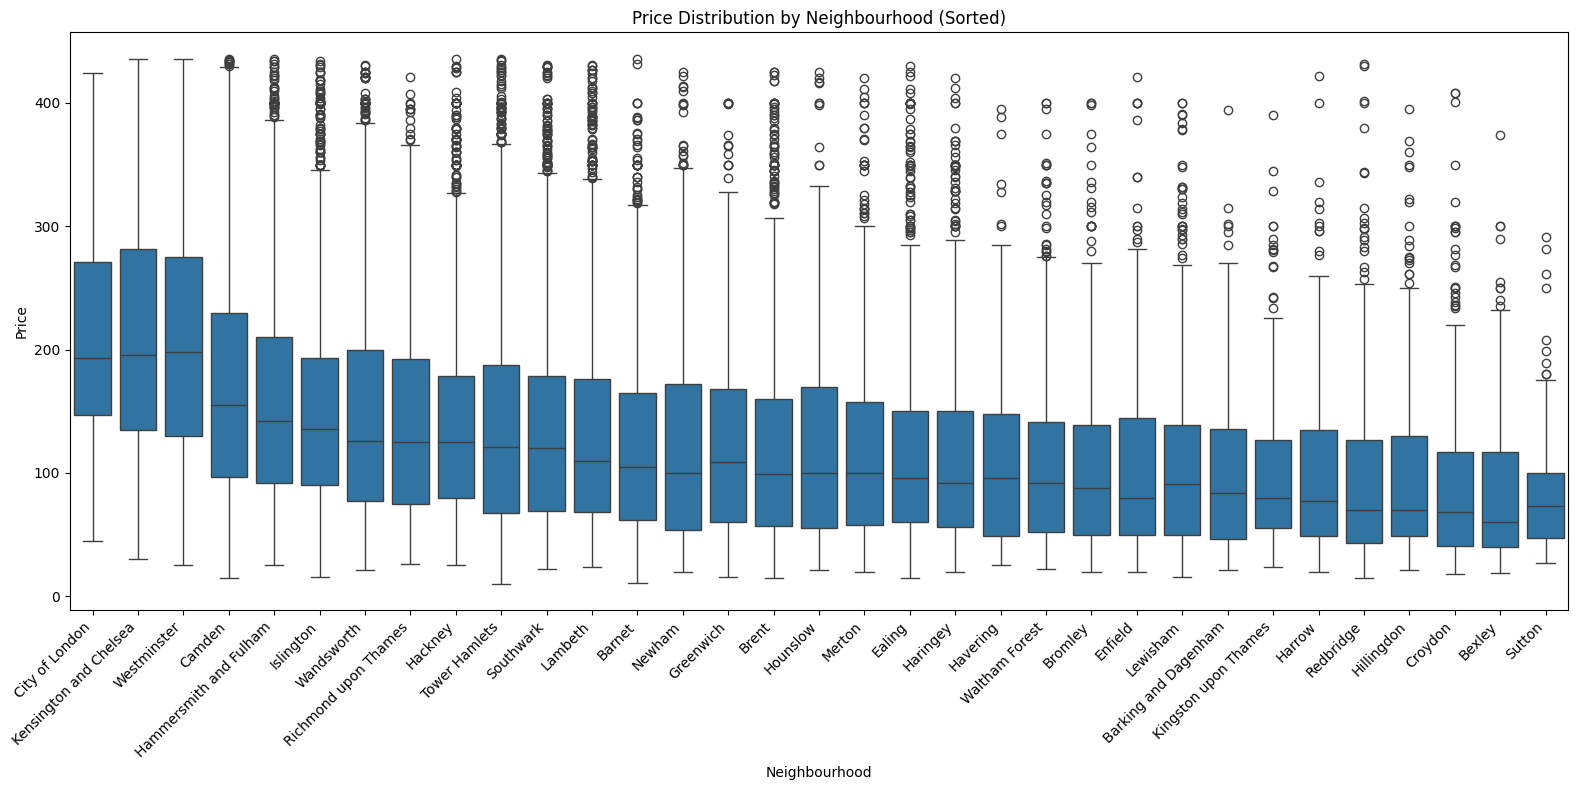

In [17]:
"""Visualising the price across neighbourhoods: box plot"""

#Use this dataframe as a means to display the boxplot
neighbourhood_order = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).index

#Creating the box plot
plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x='neighbourhood', y='price', order=neighbourhood_order)

#Labelleing, format and print
plt.title("Price Distribution by Neighbourhood (Sorted)")
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.xticks(rotation=45, ha='right')  # ha='right' helps align angled labels better
plt.tight_layout()
plt.show()


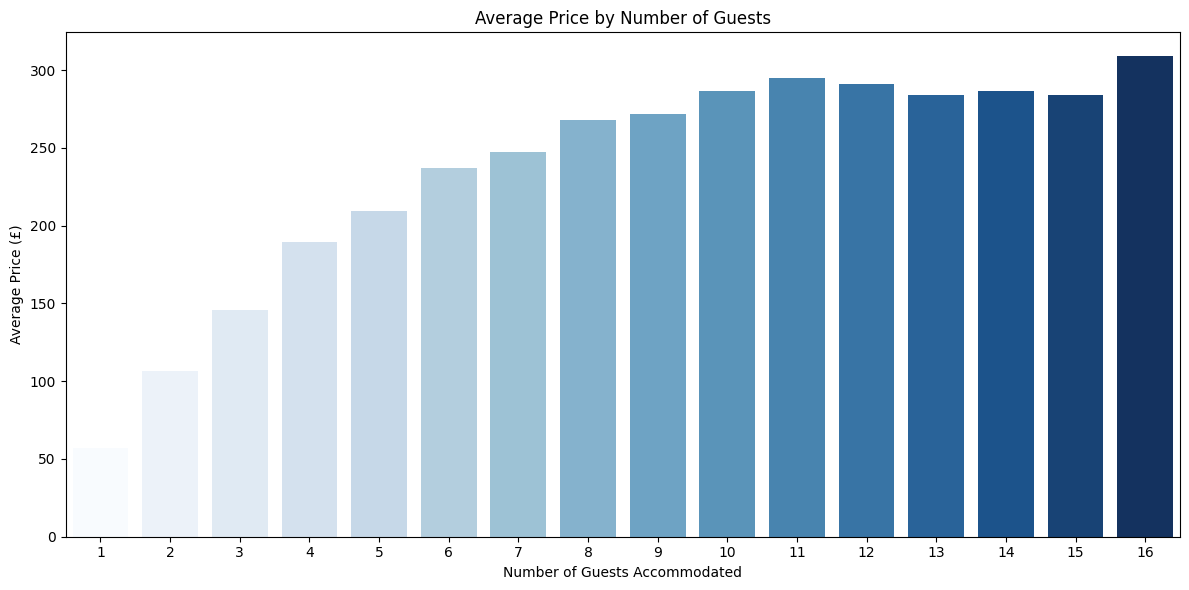

In [18]:
"""Visualisng the price across tenants"""

#Use this dataframe as a means to display the barplot
avg_price_by_guests = (df.groupby('accommodates_vis', as_index=False)['price'].mean().sort_values(by='accommodates_vis'))

#Creating the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_guests, x='accommodates_vis', y='price', hue='accommodates_vis', palette='Blues', legend=False)

#Labelling, format and print
plt.title("Average Price by Number of Guests")
plt.xlabel("Number of Guests Accommodated")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.tight_layout()
plt.show()

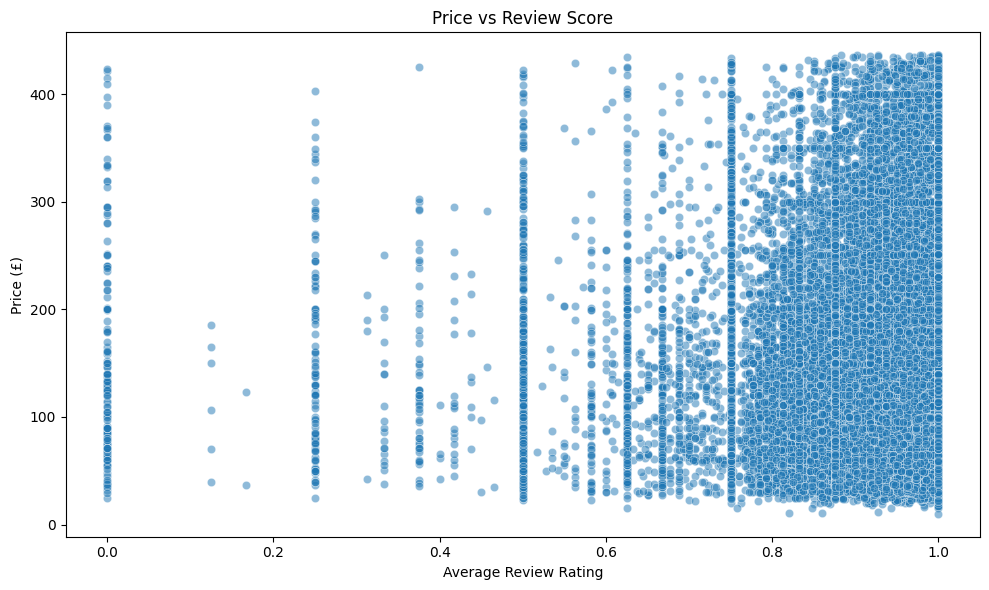

Correlation between review score and price: 0.01


In [19]:
"""Exploring whether the average review ratings affect the price"""

#Creating scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='review_scores_rating', y='price', alpha=0.5)

#Labelling, format and print 
plt.title("Price vs Review Score")
plt.xlabel("Average Review Rating")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()


correlation = df[['review_scores_rating', 'price']].corr().iloc[0, 1]
print(f"Correlation between review score and price: {correlation:.2f}")

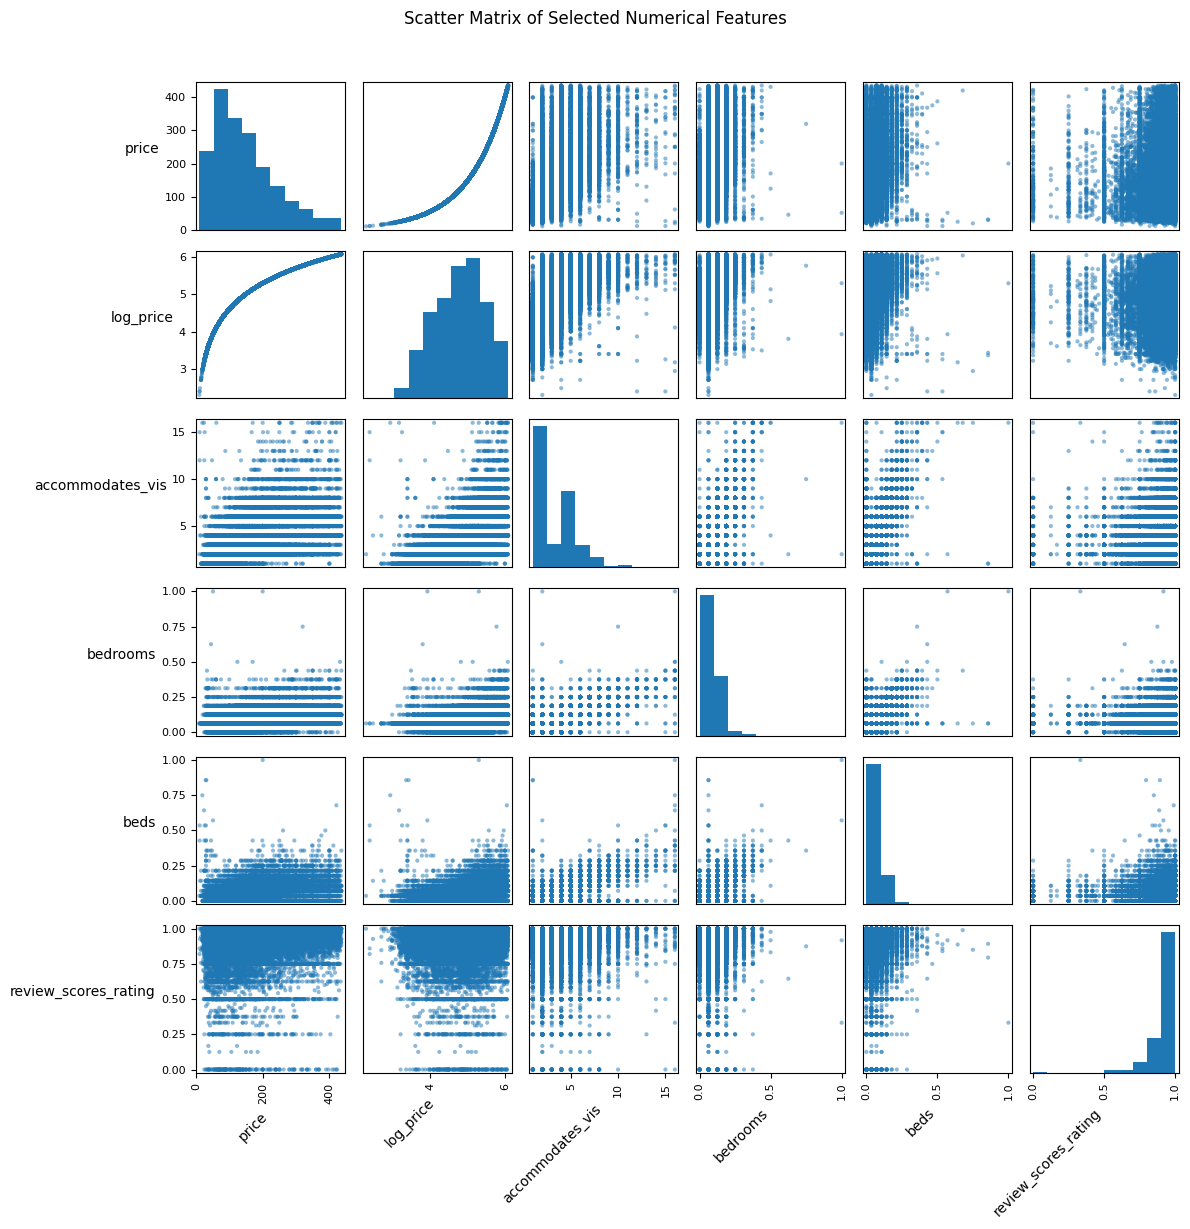

In [20]:
"""Showing the scatter matrix plot"""
features = ['price','log_price','accommodates_vis','bedrooms','beds','review_scores_rating']
#Creating the scatter matrix
scatter_fig = scatter_matrix(df[features], figsize=(12, 12), diagonal='hist')

#Rotating axis labels for readability
for ax in scatter_fig.ravel():
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')

#Labelling and print
plt.suptitle("Scatter Matrix of Selected Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

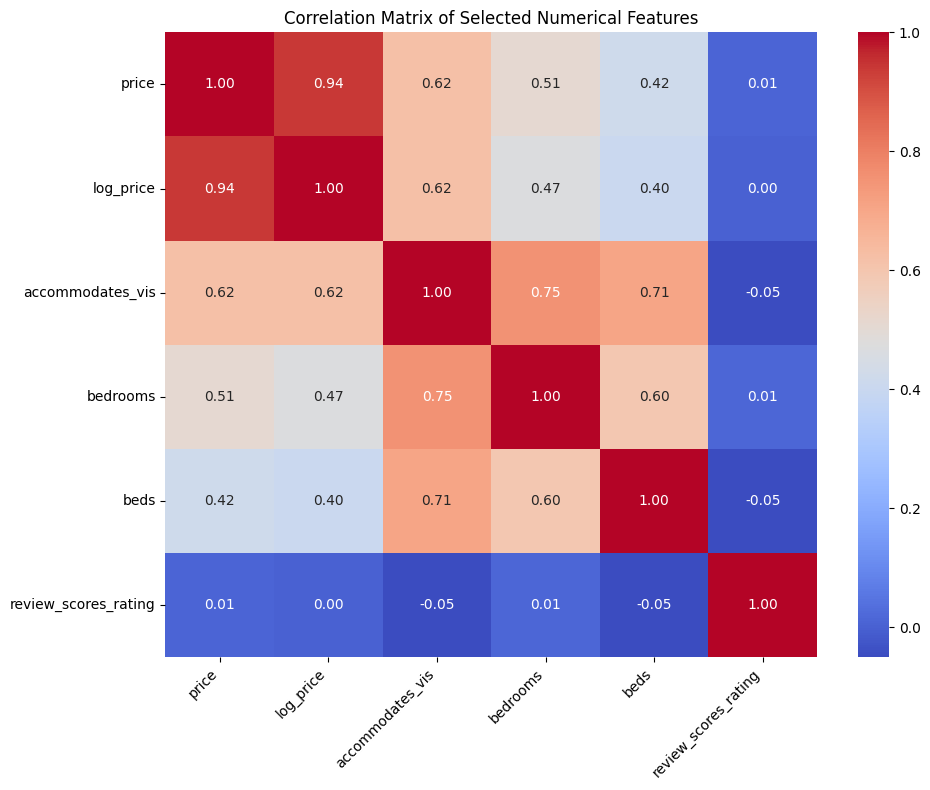

In [21]:
"""Showing the correlation matrix"""

#Creating the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')

#Labels and print
plt.title("Correlation Matrix of Selected Numerical Features")
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)                
plt.tight_layout()
plt.show()


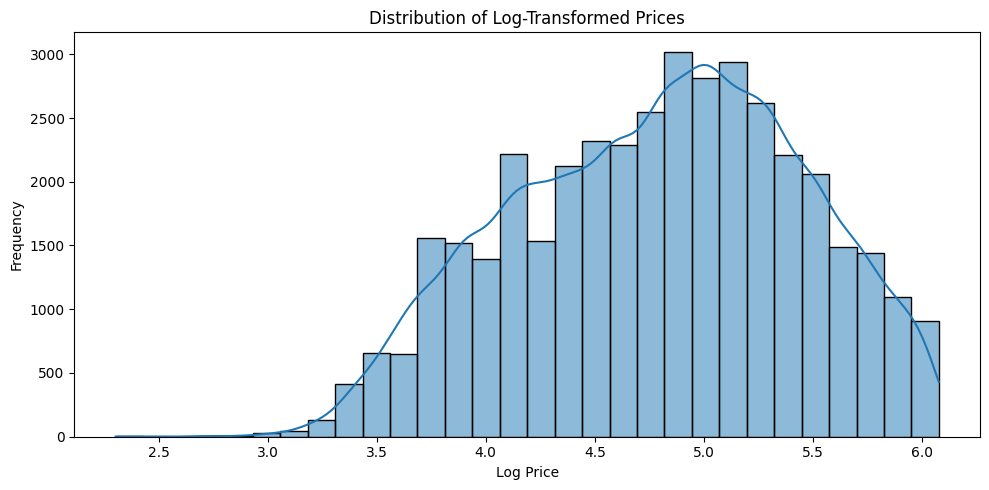

In [22]:
"""Visualising the distribution of log-transformed prices"""

#Creating Historgram
plt.figure(figsize=(10, 5))
sns.histplot(df['log_price'], bins=30, kde=True)

#Labelling and print
plt.title("Distribution of Log-Transformed Prices")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


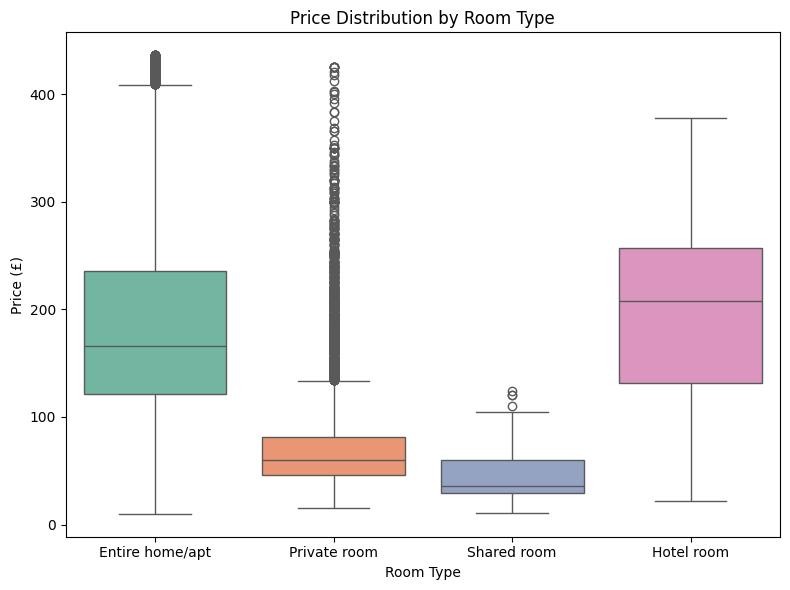

In [23]:
"""Box plot: Price distribution by room type"""

#Creating box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='room_type', y='price', hue='room_type', legend=False, palette='Set2')

#Labelling and print
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price (£)")
plt.tight_layout()
plt.show()


In [24]:
"""Model building"""

'Model building'

In [25]:
"""Imports for model building"""
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [26]:
"""Selecting predictors"""

#Defining the predictors and outcome variable
X = df[num_variables]  #predictors
y = df['log_price']    #outcome

#Fitting RFE with linear regression to find top 10 predictors
model = LinearRegression()
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X, y)

#Retrieving selected predictors
selected_predictors = X.columns[selector.support_]
X_selected = X[selected_predictors]

#Printing full feature rankings for justificiton of choices
predictors_ranks = pd.Series(selector.ranking_, index=X.columns).sort_values()
print("Predictors Rankings (1 = selected):\n", predictors_ranks)


Predictors Rankings (1 = selected):
 host_listings_count               1
host_total_listings_count         1
accommodates                      1
bathrooms                         1
bedrooms                          1
beds                              1
minimum_nights                    1
maximum_nights                    1
number_of_reviews                 1
calculated_host_listings_count    1
review_scores_rating              2
host_acceptance_rate              3
host_response_rate                4
dtype: int64


In [27]:
"""Building up first linear model, and evaluating it"""

#Splitting data into test and training data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

#Training model
reg = LinearRegression()
reg.fit(X_train, y_train)

#Predicting using test set
y_pred = reg.predict(X_test)

#Evaluating
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.3873
RMSE: 0.5136
MAE: 0.4089


In [28]:
"""Selecting and including categorical predictors for a second model"""

#Defining the predictors and outcome variable
X_num = df[num_variables]  #predictors
y = df['log_price']    #outcome

#Fitting RFE with linear regression to find top 10 predictors
model = LinearRegression()
selector = RFE(model, n_features_to_select=10)
selector = selector.fit(X_num, y)

#Retrieving selected numerical predictors
selected_predictors = X.columns[selector.support_]
X_selected = X[selected_predictors]

#Printing feature rankings for justification
predictor_ranks = pd.Series(selector.ranking_, index=X_num.columns).sort_values()
print("Predictor Rankings (1 = selected):\n")
print(predictor_ranks)

#Defining categroical predictors and encoding them
categorical_vars = ['neighbourhood', 'property_type','room_type']
X_cat = pd.get_dummies(df[categorical_vars], drop_first=True)

#Combining numerical and categorical predictors
X_improved = pd.concat([X_selected, X_cat], axis=1)

#Printing numerical predictors selected
print("\nSelected Numerical Predictors:")
print(selected_predictors)

#Printing categroical predictors selected
print("\nEncoded Categorical Predictors:")
print(X_cat.columns.tolist())

print("\nFinal Shape of X_improved:", X_improved.shape)

Predictor Rankings (1 = selected):

host_listings_count               1
host_total_listings_count         1
accommodates                      1
bathrooms                         1
bedrooms                          1
beds                              1
minimum_nights                    1
maximum_nights                    1
number_of_reviews                 1
calculated_host_listings_count    1
review_scores_rating              2
host_acceptance_rate              3
host_response_rate                4
dtype: int64

Selected Numerical Predictors:
Index(['host_listings_count', 'host_total_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'calculated_host_listings_count'],
      dtype='object')

Encoded Categorical Predictors:
['neighbourhood_Barnet', 'neighbourhood_Bexley', 'neighbourhood_Brent', 'neighbourhood_Bromley', 'neighbourhood_Camden', 'neighbourhood_City of London', 'neighbourhood_Croydon', 'nei

In [29]:
"""Building up second linear model, and evaluating it"""

#Splitting data into test and training data
X_train2, X_test2, y_train2, y_test2 = train_test_split( X_improved, y, test_size=0.2, random_state=42)

#Training model
reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

#Predicting using test set
y_pred2 = reg2.predict(X_test2)

#Evaluating
r2_2 = r2_score(y_test2, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
mae_2 = mean_absolute_error(y_test2, y_pred2)

print(f" Model 2 R²: {r2_2:.4f}")
print(f" Model 2 RMSE: {rmse_2:.4f}")
print(f" Model 2 MAE: {mae_2:.4f}")


 Model 2 R²: 0.7181
 Model 2 RMSE: 0.3484
 Model 2 MAE: 0.2721


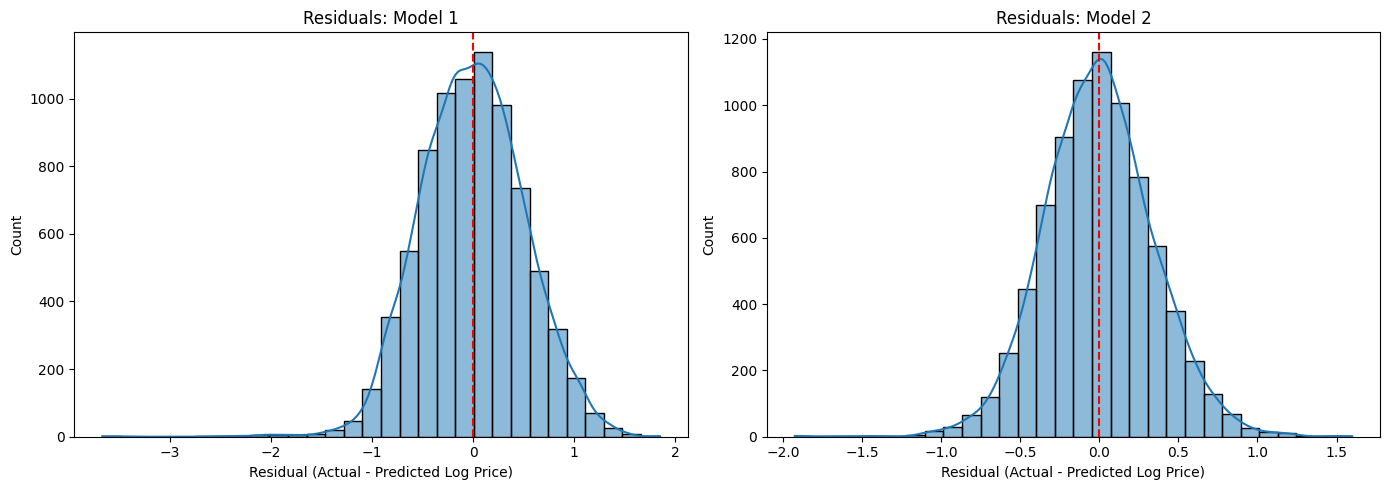

In [30]:
"""Plotting Histogram of Residuals"""

#Defining the residuals of the two models
residuals_1 = y_test - y_pred       # First model
residuals_2 = y_test2 - y_pred2     # Improved model


plt.figure(figsize=(14, 5))

#Subplot 1: Baseline Model
plt.subplot(1, 2, 1)
sns.histplot(residuals_1, kde=True, bins=30)
plt.title("Residuals: Model 1")
plt.xlabel("Residual (Actual - Predicted Log Price)")
plt.axvline(0, color='red', linestyle='--')

#Subplot 2: Improved Model
plt.subplot(1, 2, 2)
sns.histplot(residuals_2, kde=True, bins=30)
plt.title("Residuals: Model 2")
plt.xlabel("Residual (Actual - Predicted Log Price)")
plt.axvline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [31]:
"""Cross validating procedures"""

# Defining models
model_1 = LinearRegression()
model_2 = LinearRegression()

# Cross-validating model 1 (numerical only)
cv_scores_m1 = cross_val_score(model_1, X_selected, y, scoring='r2', cv=10)
formatted_scores_m1 = [f"{score:.4f}" for score in cv_scores_m1]

#Formatting and printing
print("Model 1 - Cross-Validation R² Scores:")
print("[ " + "  ".join(formatted_scores_m1) + " ]")
print(f"Model 1 - Mean CV R²: {cv_scores_m1.mean():.4f}")

#Formatting
print("\n" + "-"*60 + "\n")

# Cross-validating model 2 (numerical + categorical)
cv_scores_m2 = cross_val_score(model_2, X_improved, y, scoring='r2', cv=10)
formatted_scores_m2 = [f"{score:.4f}" for score in cv_scores_m2]

#Formatting and printing
print("Model 2 - Cross-Validation R² Scores:")
print("[ " + "  ".join(formatted_scores_m2) + " ]")
print(f"Model 2 - Mean CV R²: {cv_scores_m2.mean():.4f}")

Model 1 - Cross-Validation R² Scores:
[ 0.3379  0.3914  0.3987  0.3716  0.4396  0.4042  0.2720  -85909.2828  0.3199  0.3756 ]
Model 1 - Mean CV R²: -8590.5972

------------------------------------------------------------

Model 2 - Cross-Validation R² Scores:
[ 0.6935  0.7120  0.7224  0.7131  0.7306  0.7182  0.6292  -25230.7676  0.6943  0.6795 ]
Model 2 - Mean CV R²: -2522.4475
